## HIGH DIMENSIONAL ANALYSIS
### Programming Exercise: 04
### Nguyễn Quốc Bảo - 18110053

# Table of Content
1. Introduction
2. Summary of the t-SNE
3. Applying the t-SNE on Fashion-MNIST dataset

# Introduction

t-Distributed Stochastic Neighbor Embedding (t-SNE) cho bài toán unsupervised, là kỹ thuật non-linear dùng để giảm số chiều, đặc biệt là thăm dò và trực quan dữ liệu có nhiều chiều.
Nó đã được phát hiện bởi Laurens van der Maatens và Geoffrey Hinton vào năm 2008.

Nó được ứng dụng rộng rãi trong xử lý hình ảnh, NLP, dữ liệu bộ gen và xử lý giọng nói. Để giữ mọi thứ đơn giản, đây là tổng quan ngắn gọn về hoạt động của t-SNE

# Summary of the t-SNE

Thuật toán t-SNE giải quyết vấn đề này và tôi sẽ giải thích hiệu suất của nó theo ba giai đoạn:

* Tính toán phân phối xác suất chung thể hiện sự tương đồng giữa các điểm dữ liệu. Nghĩa là,

Tính toán các xác suất ${\displaystyle p_ {ij}}$ tỷ lệ với mức độ giống nhau của các đối tượng ${\displaystyle \mathbf{x}_{i}}$ và ${\displaystyle \mathbf{x}_{j}}$, như sau. Đối với ${\displaystyle i \neq j}$, hãy xác định
$$\displaystyle p_ {ij} = \dfrac{exp(- || \mathbf{x}_{i} - \mathbf{x}_{j}||^2 / 2 \sigma_i^2)}{\Sigma_{k \neq i} exp(- || \mathbf{x}_{i} - \mathbf{x}_{k}||^2 / 2 \sigma_i^2)} $$

* Tạo tập dữ liệu về các điểm trong thứ nguyên mục tiêu và sau đó cũng tính toán phân phối xác suất chung cho chúng.

Phần tiếp theo của t-SNE là tạo không gian chiều thấp với cùng số điểm như trong không gian ban đầu. Mục tiêu của thuật toán này là tìm phân phối xác suất tương tự trong không gian chiều thấp. Vì thế, 
t-SNE nhằm mục đích giảm xuống ${\displaystyle d}$ chiều không gian ${\displaystyle \mathbf{y}_{1}, \cdots, \mathbf{y}_{N}}$ (với ${\displaystyle \mathbf{y }_{i} \in \mathbb{R}^{d}})$ phản ánh các điểm tương đồng với ${\displaystyle p_{ij}}$ càng tốt. Vì vậy, nó đo lường sự tương đồng ${\displaystyle q_{ij}}$ giữa hai điểm trong không gian ${\displaystyle \mathbf {y}_{i}}$ và ${\displaystyle \mathbf{y}_{j}}$, bằng cách sử dụng một cách tiếp cận rất giống nhau. Cụ thể, đối với ${\displaystyle i \neq j}$, hãy xác định ${\displaystyle q_{ij}}$ là

$$\displaystyle q_ {ij} = \dfrac{(1 - || \mathbf{y}_{i} - \mathbf{y}_{j}||^2 )^{-1}}{\Sigma_{k \neq l} (1 + || \mathbf{y}_{k} - \mathbf{y}_{l}||^2)^{-1}} $$

* Sử dụng gradient descent để thay đổi tập dữ liệu trong không gian chiều thấp sao cho phân phối xác suất chung đại diện cho nó càng giống với phân bố trong chiều cao càng tốt.

Vị trí của các điểm ${\displaystyle \mathbf{y}_{i}}$ trong không gian được xác định bằng cách giảm thiểu sự phân kỳ Kullback – Leibler (không đối xứng) của phân bố ${\displaystyle P}$ từ phân bố ${\displaystyle Q }$, đó là:
$$ D_{KL}(P||Q) = \displaystyle \sum_{i \neq j} p_{ij} \log \dfrac{p_{ij}}{q_{ij}} $$
Khi các phân bố càng giống nhau, giá trị của sự phân kỳ KL càng nhỏ, bằng không khi các phân bố giống nhau

Lưu ý:
1. Vấn đề lớn một trong những hạn chế của t-SNE, mặc dù phân phối Student chắc chắn đã giúp ích rất nhiều, nhưng nó không đảm bảo bạn bảo toàn tất cả các điểm lân cận trong chiều thấp hơn, nó chỉ cố gắng đưa ra giải pháp tốt nhất để bảo tồn các cấu trúc cục bộ của dữ liệu.
2. Thuật toán liên quan đến rất nhiều phép tính và tính toán. Vì vậy, thuật toán mất rất nhiều thời gian và không gian để tính toán.
3. t-SNE không bảo toàn khoảng cách giữa các cụm.

# Import Library

In [3]:
#import các thư viện
import numpy as np
import pandas as pd
import keras
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from scipy import linalg
from sklearn.manifold import _t_sne
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị
import seaborn as sns

# Applying the t-SNE on Fashion-MNIST dataset

In [4]:
from tensorflow.keras.datasets import fashion_mnist

## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_test = np.vstack([X_train, X_test])
train_test.shape

(70000, 28, 28)

In [7]:
X = np.zeros((train_test.shape[0], 784))
for i in range(train_test.shape[0]):
    X[i] = train_test[i].flatten()
X.shape

(70000, 784)

In [8]:
y = np.hstack([y_train, y_test])
print(y.shape)
np.unique(y)

(70000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
label_dictionnary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }
def true_label(x):
    return label_dictionnary[x]

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  Ankle boot


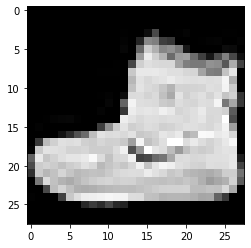

In [10]:
## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", true_label(y_train[0]))
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [23]:
# randomly sample data to run quickly
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 20000

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca' ,verbose=True, perplexity=30, n_iter=1000, learning_rate=200, random_state=0)
X_tsne = tsne.fit_transform(X[rows[:n_select],:])
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 2.214s...
[t-SNE] Computed neighbors for 20000 samples in 628.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sampl

In [25]:
X_tsne.shape

(20000, 2)

In [26]:
# visualize
df_tsne = pd.DataFrame(X_tsne, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
df_tsne['label'] = df_tsne['label'].apply(true_label)

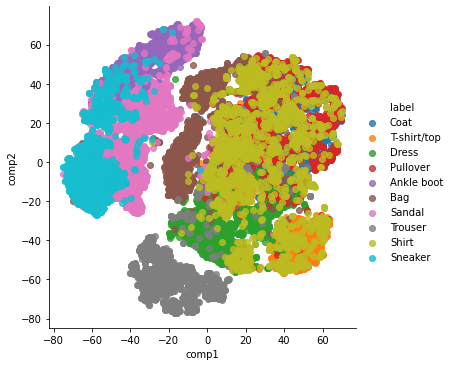

In [27]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

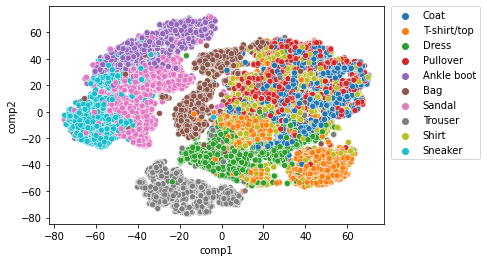

In [43]:
sns.scatterplot(x = 'comp1', y = 'comp2', hue = 'label', data=df_tsne)
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [45]:
df_tsne.to_csv('fashion_mnist_2D.csv')